# Análisis de Alarmas
En relación al sistema planteado: Buscador de llaves, analicemos algunas alternativas de alarmas.
<center><img src="silbido.png"></center>


In [22]:
from scipy import fft
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.lib.display import Audio

In [23]:
Audio(filename='alarmas/alarm.wav')

In [24]:
Audio(filename='alarmas/cooper_fulleon_sounder_tone_3.wav')

In [25]:
Audio(filename='alarmas/cooper_fulleon_sounder_tone_6.wav')

In [26]:
Audio(filename='alarmas/cooper_fulleon_sounder_tone_9.wav')

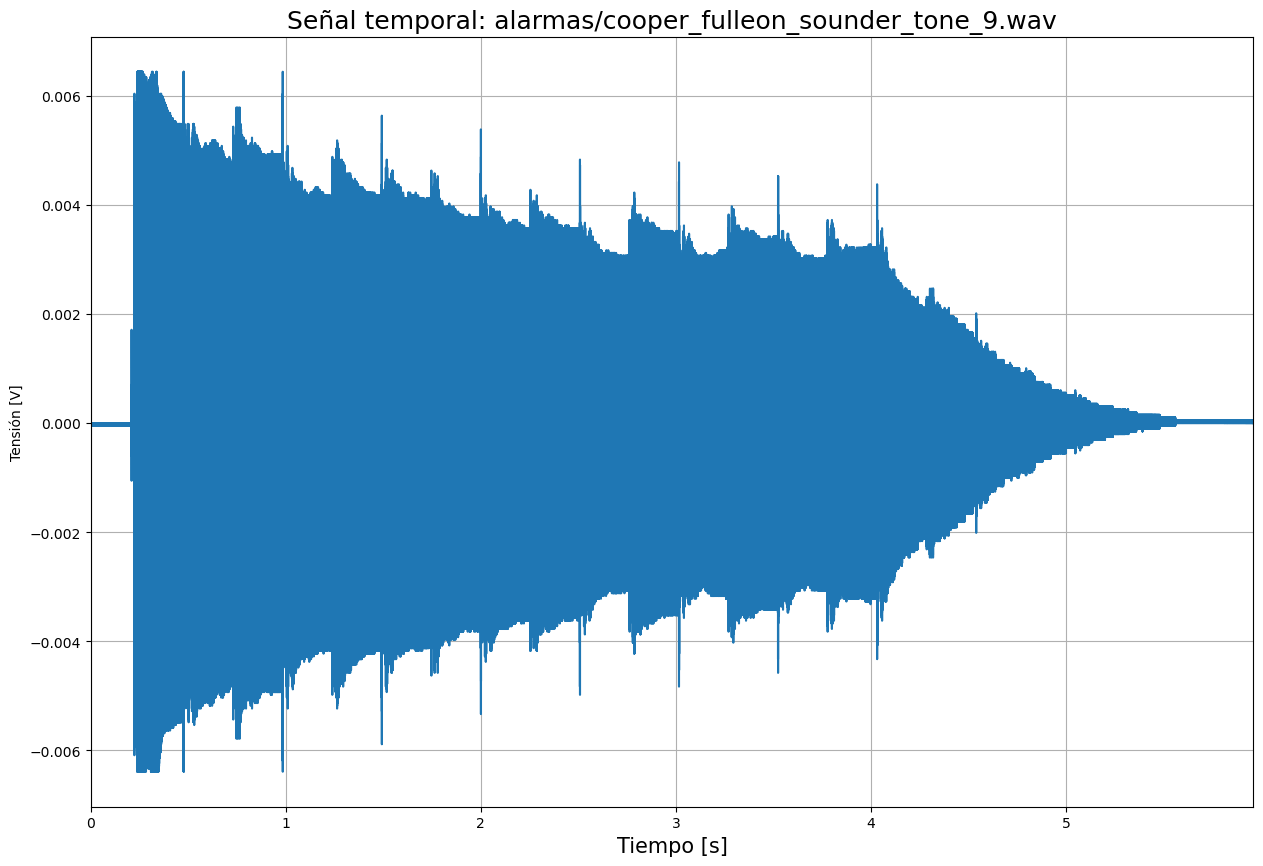

In [27]:
filename = 'alarmas/cooper_fulleon_sounder_tone_9.wav'          # nombre de archivo
fs, data = wavfile.read(filename)   # frecuencia de muestreo y datos de la señal

# Definición de parámetro temporales
ts = 1 / fs                     # tiempo de muestreo
N = len(data)                   # número de muestras en el archivo de audio
t = np.linspace(0, N * ts, N)   # vector de tiempo
senial = data - data.mean()#[:, 1]            # se extrae un canal de la pista de audio (si el audio es estereo)
senial = senial * 3.3 / (2 ** 16 - 1) # se escala la señal a voltios (considerando un CAD de 16bits y Vref 3.3V)

# Se grafica la señal temporal
plt.figure(figsize=(15, 10))
plt.plot(t, senial)
plt.xlabel('Tiempo [s]', fontsize=15)
plt.ylabel('Tensión [V]', fontsize=10)
plt.title('Señal temporal: '+ filename, fontsize=18)
plt.xlim([0, ts*N])
plt.grid()

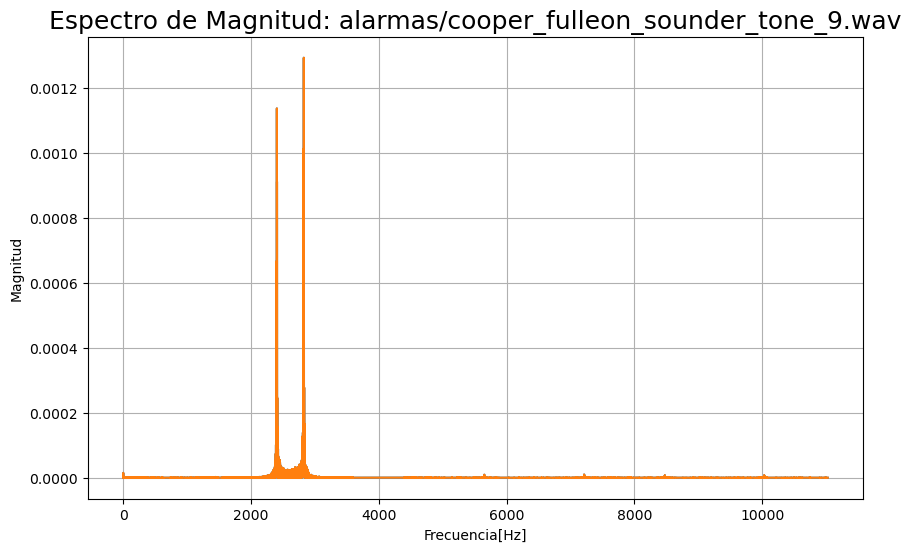

In [28]:
#################### Cálculo de la Transformada de Fourier ###################

freq = fft.fftfreq(N, d=1/fs)   # se genera el vector de frecuencias
senial_fft = fft.fft(senial)    # se calcula la transformada rápida de Fourier

# El espectro es simétrico, nos quedamos solo con el semieje positivo
f = freq[np.where(freq >= 0)]      
senial_fft = senial_fft[np.where(freq >= 0)]

# Se calcula la magnitud del espectro
senial_fft_mod = np.abs(senial_fft) / N     # Respetando la relación de Parseval
# Al haberse descartado la mitad del espectro, para conservar la energía 
# original de la señal, se debe multiplicar la mitad restante por dos (excepto
# en 0 y fm/2)
senial_fft_mod[1:len(senial_fft_mod-1)] = 2 * senial_fft_mod[1:len(senial_fft_mod-1)]

#Ahora graficamos el espectro
plt.figure(figsize=(10,6))
plt.plot(f,senial_fft_mod)
plt.plot(f,senial_fft_mod)
plt.grid()
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.title('Espectro de Magnitud: '+ filename, fontsize=18)
plt.show()


# Conclusión

A partir del espectro de la señal elegida considero que cumple con los requisitos para la aplicación ya que no se solapa en frecuencia con el espectro del silbido y su energía se encuentra más localizada en frecuencia respecto a las demás alarmas. 